In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/kaggle/input/new-york-housing-market/NY-House-Dataset.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [152]:
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [153]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

df = df[num_cols]

print(df)

          PRICE  BEDS       BATH  PROPERTYSQFT   LATITUDE  LONGITUDE
0        315000     2   2.000000   1400.000000  40.761255 -73.974483
1     195000000     7  10.000000  17545.000000  40.766393 -73.980991
2        260000     4   2.000000   2015.000000  40.541805 -74.196109
3         69000     3   1.000000    445.000000  40.761398 -73.974613
4      55000000     7   2.373861  14175.000000  40.767224 -73.969856
...         ...   ...        ...           ...        ...        ...
4796     599000     1   1.000000   2184.207862  40.774350 -73.955879
4797     245000     1   1.000000   2184.207862  40.732538 -73.860152
4798    1275000     1   1.000000   2184.207862  40.745882 -74.003398
4799     598125     2   1.000000    655.000000  40.742770 -73.872752
4800     349000     1   1.000000    750.000000  40.579147 -73.970949

[4801 rows x 6 columns]


In [154]:
from sklearn.model_selection import train_test_split

X = df.drop(["PRICE"], axis=1)
y = df["PRICE"]

print(y)

0          315000
1       195000000
2          260000
3           69000
4        55000000
          ...    
4796       599000
4797       245000
4798      1275000
4799       598125
4800       349000
Name: PRICE, Length: 4801, dtype: int64


In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [156]:
train_data = X_train.join(y_train)
print(train_data)

      BEDS  BATH  PROPERTYSQFT   LATITUDE  LONGITUDE     PRICE
1486     3   2.0        2600.0  40.609816 -73.908403   1295000
4051     3   2.0        1870.0  40.541476 -74.174618    699888
4375     6   2.0        2444.0  40.554623 -74.134995    825000
3887     2   2.0        1238.0  40.549321 -74.174422    565000
1827     5   4.0        4100.0  40.735863 -74.002209  12995000
...    ...   ...           ...        ...        ...       ...
3590     2   2.0        1175.0  40.709219 -74.013753   1450000
1252     3   4.0        2054.0  40.770476 -73.957455   4250000
3441     3   2.0        1117.0  40.742075 -73.975797   1450000
1420     5   4.0        2000.0  40.735335 -73.714203   1448000
1507     3   2.0        1222.0  40.627717 -74.086027    675000

[3840 rows x 6 columns]


array([[<Axes: title={'center': 'BEDS'}>,
        <Axes: title={'center': 'BATH'}>],
       [<Axes: title={'center': 'PROPERTYSQFT'}>,
        <Axes: title={'center': 'LATITUDE'}>],
       [<Axes: title={'center': 'LONGITUDE'}>,
        <Axes: title={'center': 'PRICE'}>]], dtype=object)

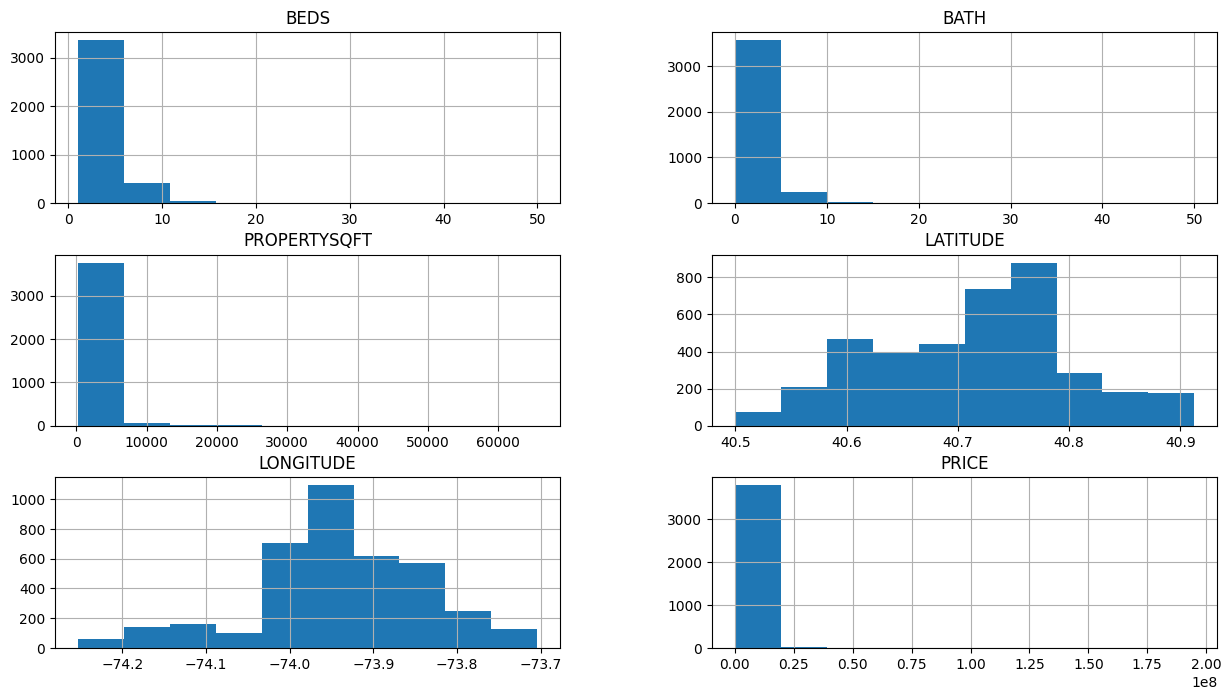

In [157]:
train_data.hist(figsize=(15, 8))

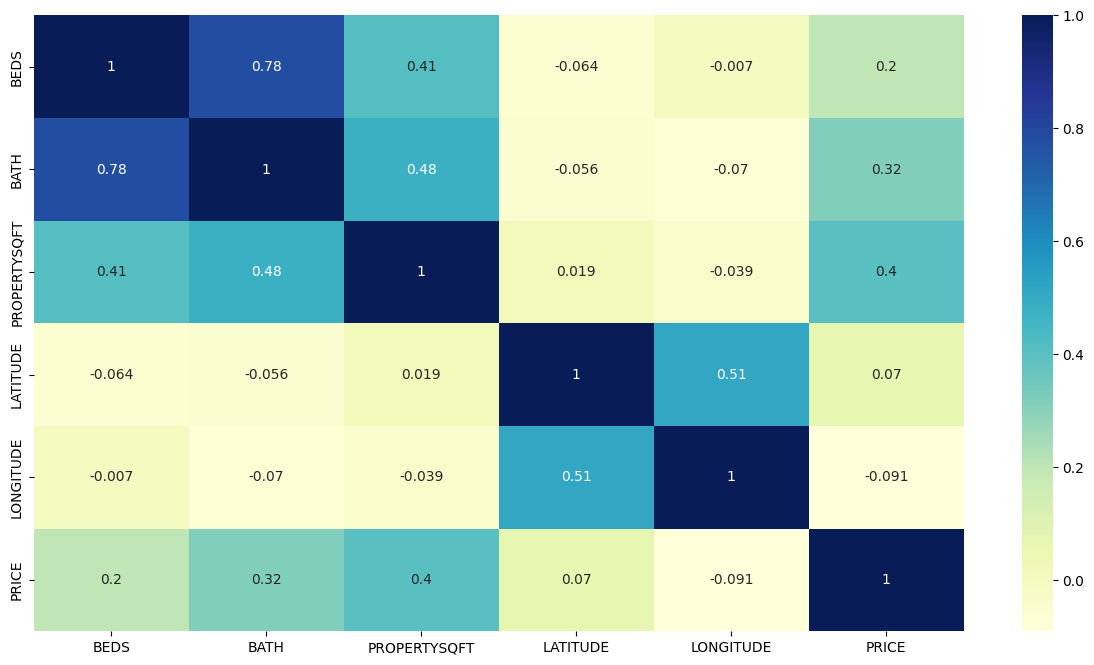

In [161]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")
plt.show()

DATA PREPROCESSING

array([[<Axes: title={'center': 'BEDS'}>,
        <Axes: title={'center': 'BATH'}>],
       [<Axes: title={'center': 'PROPERTYSQFT'}>,
        <Axes: title={'center': 'LATITUDE'}>],
       [<Axes: title={'center': 'LONGITUDE'}>,
        <Axes: title={'center': 'PRICE'}>]], dtype=object)

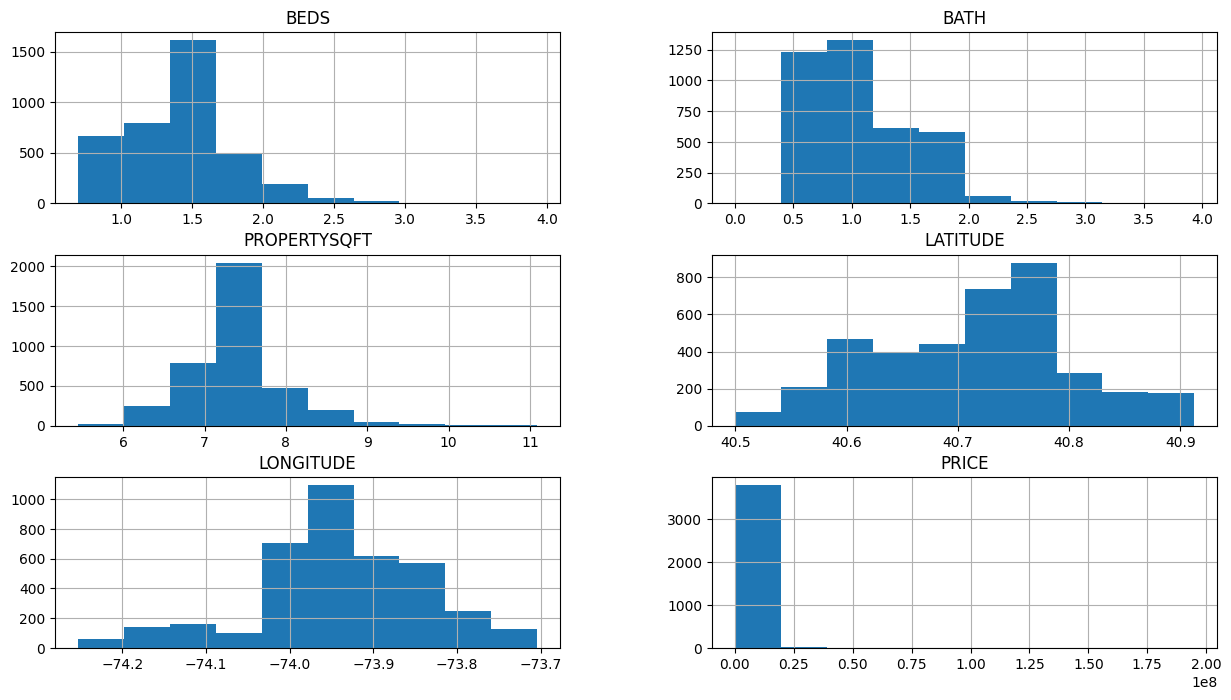

In [163]:
train_data['BEDS'] = np.log(train_data['BEDS'] + 1)
train_data['BATH'] = np.log(train_data['BATH'] + 1)
train_data['PROPERTYSQFT'] = np.log(train_data['PROPERTYSQFT'] + 1)

train_data.hist(figsize=[15,8])

FEATURE ENGINEERING

In [170]:
train_data["bedroom_ratio"] = train_data["BEDS"] / train_data["PROPERTYSQFT"] 
train_data["bathroom_ratio"] = train_data["BATH"] / train_data["PROPERTYSQFT"]  

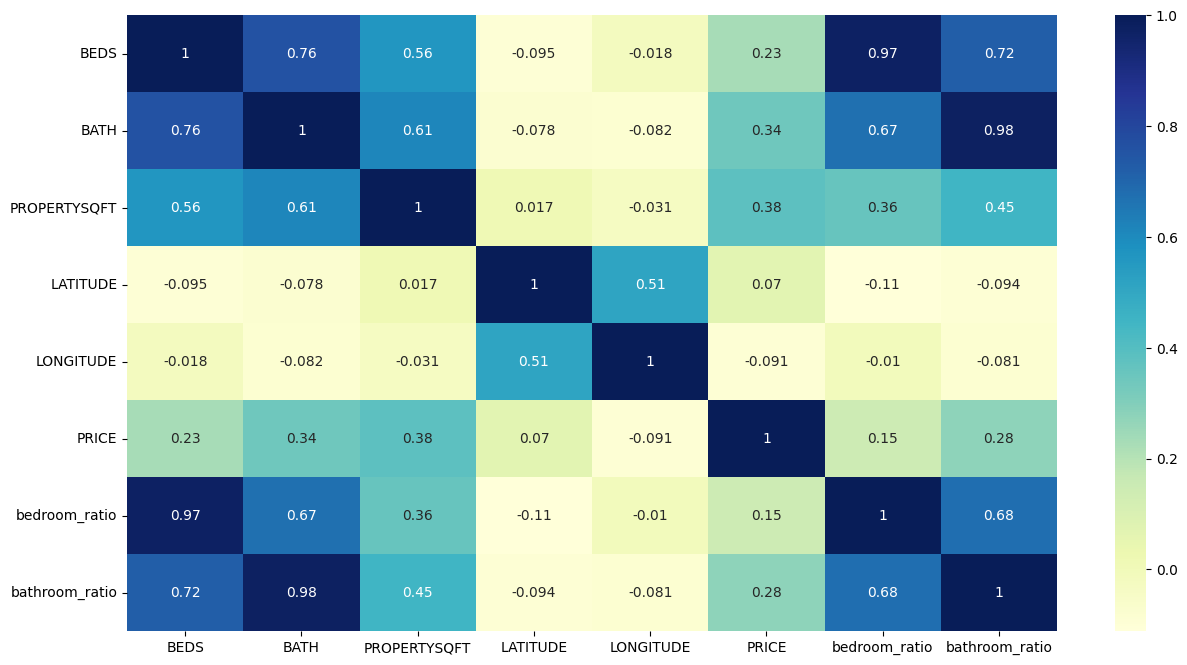

In [171]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")
plt.show()

TRAINING

In [199]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import numpy as np

# Apply transformations to the training data
train_data['BEDS'] = np.log(train_data['BEDS'] + 1)
train_data['BATH'] = np.log(train_data['BATH'] + 1)
train_data['PROPERTYSQFT'] = np.log(train_data['PROPERTYSQFT'] + 1)
# train_data["bedroom_ratio"] = train_data["BEDS"] / train_data["PROPERTYSQFT"]
# train_data["bathroom_ratio"] = train_data["BATH"] / train_data["PROPERTYSQFT"]

X_train = train_data.drop(["PRICE"], axis=1)
y_train = train_data["PRICE"]

# Standardize the training features
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)

# Fit the linear regression model
reg = LinearRegression()
reg.fit(X_train_s, y_train)

# Apply the same transformations to the test data
test_data['BEDS'] = np.log(test_data['BEDS'] + 1)
test_data['BATH'] = np.log(test_data['BATH'] + 1)
test_data['PROPERTYSQFT'] = np.log(test_data['PROPERTYSQFT'] + 1)
# test_data["bedroom_ratio"] = test_data["BEDS"] / test_data["PROPERTYSQFT"]
# test_data["bathroom_ratio"] = test_data["BATH"] / test_data["PROPERTYSQFT"]

X_test, y_test = test_data.drop(["PRICE"], axis=1), test_data["PRICE"]

# Ensure column order matches
assert list(X_train.columns) == list(X_test.columns), "Column mismatch between train and test data!"

# Standardize the test features
X_test_s = scaler.transform(X_test)

# Evaluate the model
score = reg.score(X_test_s, y_test)
print("Test R^2 score:", score)


Test R^2 score: -0.2821664690533716


In [203]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()

forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [204]:
forest.score(X_test_s, y_test)

0.0009063088963310317

In [208]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the model
forest = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    "n_estimators": [3, 10, 30],  # Comma added here
    "max_features": [2, 4, 6, 8]  # Ensure proper key-value separation
}

# Perform grid search
grid_search = GridSearchCV(
    forest, 
    param_grid, 
    cv=5, 
    scoring="neg_mean_squared_error", 
    return_train_score=True
)

# Fit the grid search
grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [210]:
best_forest = grid_search.best_estimator_

In [211]:
best_forest.score(X_test_s, y_test)

0.0007054959153636187